In [1]:
import pandas as pd

HR_dataset = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/HR_dataset.csv')

In [2]:
HR_dataset.head()

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,Jessica Stroud,0.38,0.53,2,157,3,0,1,0,sales,low
1,Daryl Fields,0.80,0.86,5,262,6,0,1,0,sales,medium
2,Daisy Anderson,0.11,0.88,7,272,4,0,1,0,sales,medium
3,Joseph Fernandez,0.72,0.87,5,223,5,0,1,0,sales,low
4,Herbert Moore,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
HR_dataset.shape

(15000, 11)

In [5]:
HR_dataset['left'].value_counts()

0    11428
1     3572
Name: left, dtype: int64

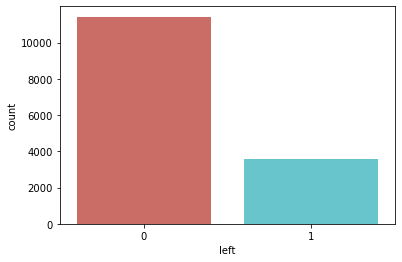

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'left', data = HR_dataset, palette = "hls")
plt.show()

In [13]:
parameters = ['satisfaction_level', 'exp_in_company', 'average_monthly_hours']

x = HR_dataset[parameters]
y = HR_dataset['left']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [15]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_prediction = log_model.predict(x_test)

In [20]:
print("Accuracy", (log_model.score(x_test, y_test)))

Accuracy 0.7623333333333333


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_prediction)
print(confusion_matrix)

[[2093  202]
 [ 511  194]]
